# Counting people until type A is identified

<font size="5">Instead of time (or distance), let's count the number of persons until type A shows up in two different locations. Can this be characterized with exponential distributions? What type A person is will remain secret. </font>
<p class="aligncenter">
    <img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fimg.pngio.com%2Fmassive-crush-pt-1-all-saints-youth-ministry-people-walking-png-gif-302_170.gif&f=1&nofb=1" alt="centered image" />
</p>


In [82]:
library(repr)
options(repr.plot.width=12, repr.plot.height=8)

In [83]:
uni.int<-c(1,1,3,1,1,3,8,1,1,7,7,2,2,11,4,1,15,1,2,1,1,
           1,1,1,1,2,1,1,1,1,2,1,3,3,3,8,7,1,10,1,1,1,1,2,1,3,2,
           1,1,1,1,1,2,1,1,2,1,1,1,2,1,5,1,1,2,1,2,1,1,3,3,1,1,1,1,
           7,1,1,1,1,4,5,2,4,1,1,1,1,1,1,1,1,1,1,1,4,2,3,1,1,3,1,
           1,1,1,1,1,1,1,4,1,1,1,5,1,1,8,4,4,1,2,1,1,1,1,2,7,1,1,
           5,7,1,1,1,2,1,1,1)#how many persons pass until type A is seen
#thus this is the proportion of type A person, much higher here
prop.int<-length(uni.int)/sum(uni.int)#pertsonen zenbat betetzen duten
prop.int

liz.int<-c(11,36,8,19,23,20,3,7,20,41,30,17,4,1,4,9,6,
           37,4,1,1,1,5,6,1,1,4,1,8,3,5,5,7,35)
#thus
#thus
prop.liz<-length(liz.int)/sum(liz.int)
prop.liz

[1] 0.4569536

[1] 0.08854167

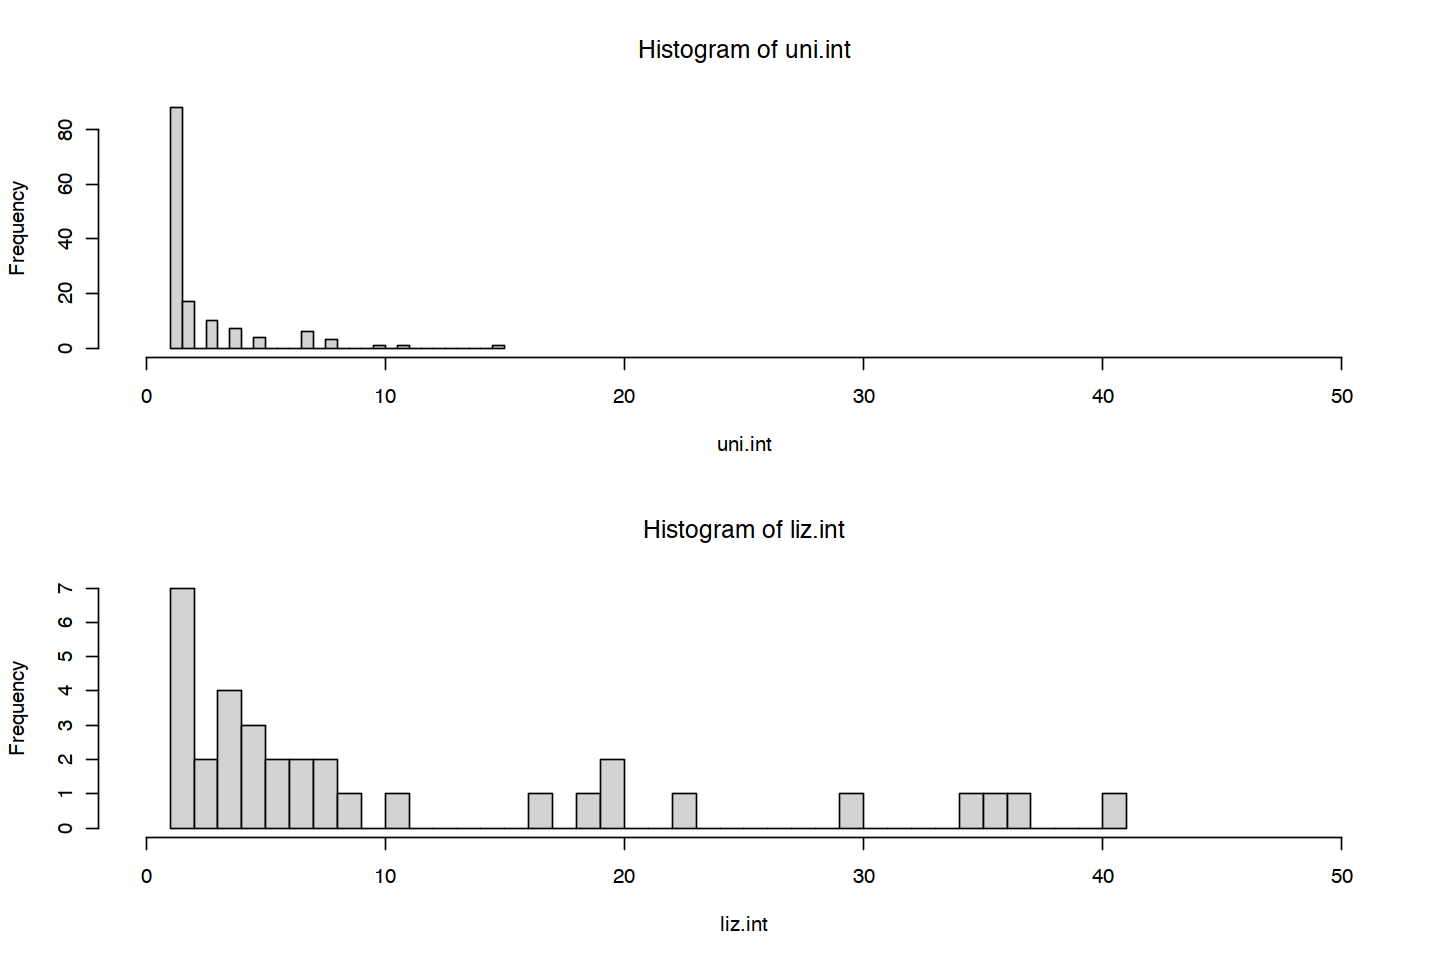

In [84]:
par(mfrow = c(2, 1))
hist(uni.int,xlim=c(0,50),breaks=30)
hist(liz.int,xlim=c(0,50),breaks=50)

In [85]:
uni.ecdf<-ecdf(uni.int)
uni.ecdf(median(uni.int))#63% of data is equal or below the median
liz.ecdf<-ecdf(liz.int)
liz.ecdf(median(liz.int))
#what about 95% of data values

[1] 0.6376812

[1] 0.5294118

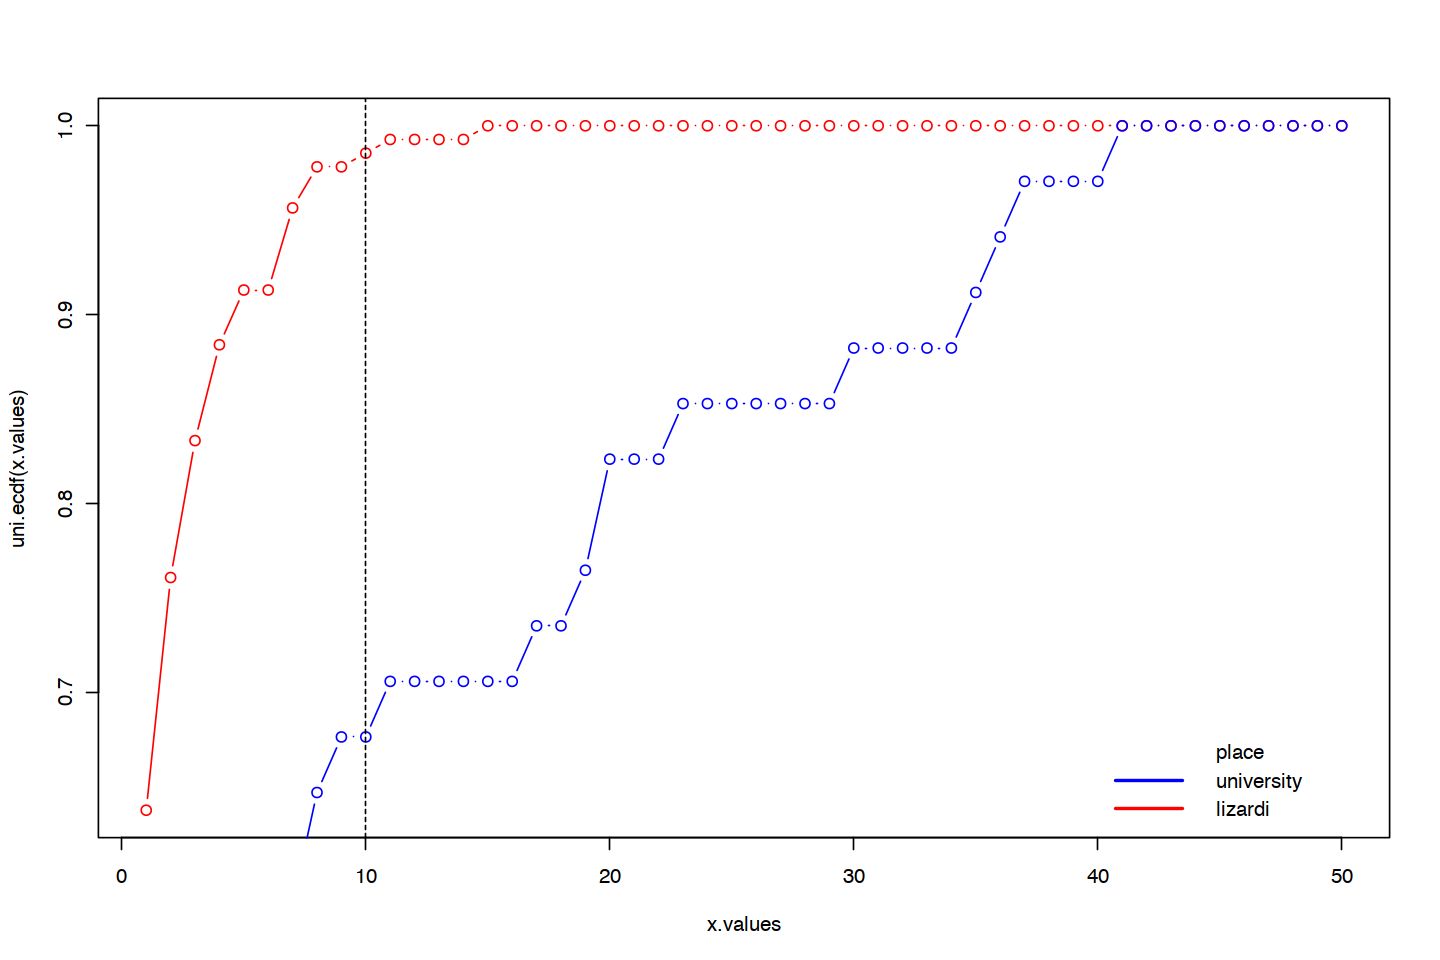

In [96]:
x.values<-seq(1,50)
plot(x.values,uni.ecdf(x.values),type="b",col="red")
lines(x.values,liz.ecdf(x.values),type="b",col="blue")
abline(v=10,lty=2)
legend("bottomright", c("place", "university", "lizardi"),
       lty = c(0, 1, 1), col = c("red", "blue"), box.lty = 0, lwd = 2)

In [95]:
uni.ecdf(10)#98% of data values are equal or less than 10
liz.ecdf(10)#67% of data values are equal or less than 10
#difference between places is really clear, we need to check more people until type A shows up.

[1] 0.9855072

[1] 0.6764706

ERROR: Error in strwidth(legend, units = "user", cex = cex, font = text.font): plot.new has not been called yet


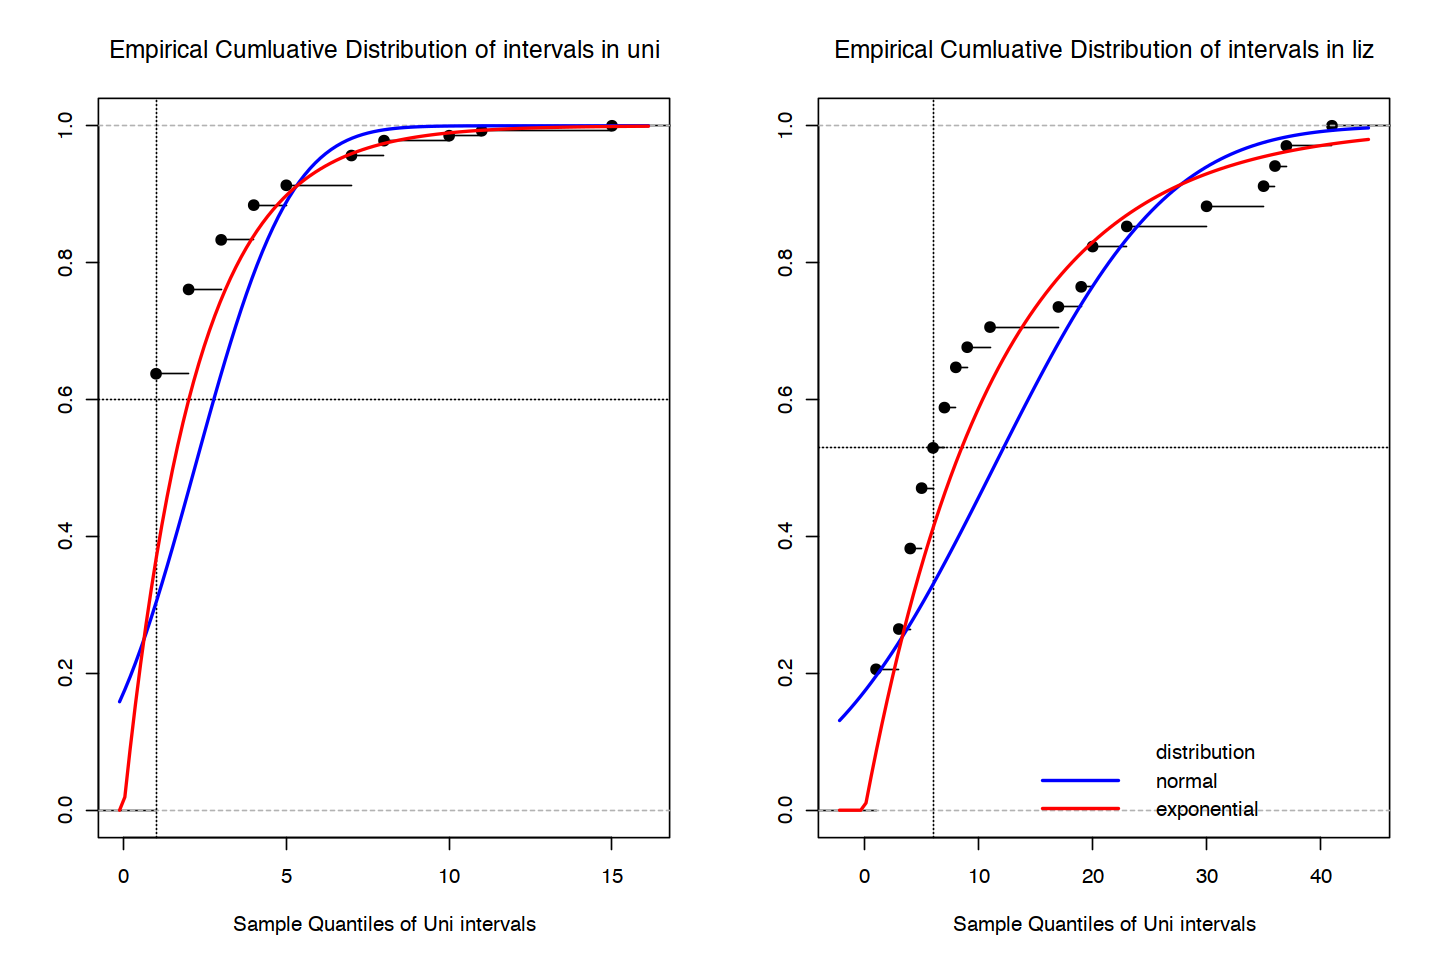

In [97]:
par(mfrow = c(1, 2))
plot(uni.ecdf, xlab = 'Sample Quantiles of Uni intervals',
     ylab = '', main = 'Empirical Cumluative Distribution of intervals in uni')
# mark the median (second quartile)
abline(v=median(uni.int),h=0.6,lty=3)#median
#theoretical ecdf for normal data
curve(pnorm(x, mean(uni.int), sd(uni.int)),
      add = TRUE, col='blue', lwd = 2)
#theoretical ecdf for exponential data
curve(pexp(x, 1/mean(uni.int)),
      add = TRUE, col='red', lwd = 2)



plot(liz.ecdf, xlab = 'Sample Quantiles of Uni intervals',
     ylab = '', main = 'Empirical Cumluative Distribution of intervals in liz')
# mark the median (second quartile)
abline(v=median(liz.int),h=0.5294118,lty=3)#median
#theoretical ecdf for normal data
curve(pnorm(x, mean(liz.int), sd(liz.int)),
      add = TRUE, col='blue', lwd = 2)
#theoretical ecdf for exponential data
curve(pexp(x, 1/mean(liz.int)),
      add = TRUE, col='red', lwd = 2)  
legend("bottomright", c("distribution", "normal", "exponential"),
       lty = c(0, 1, 1), col = c("red", "blue"), box.lty = 0, lwd = 2)

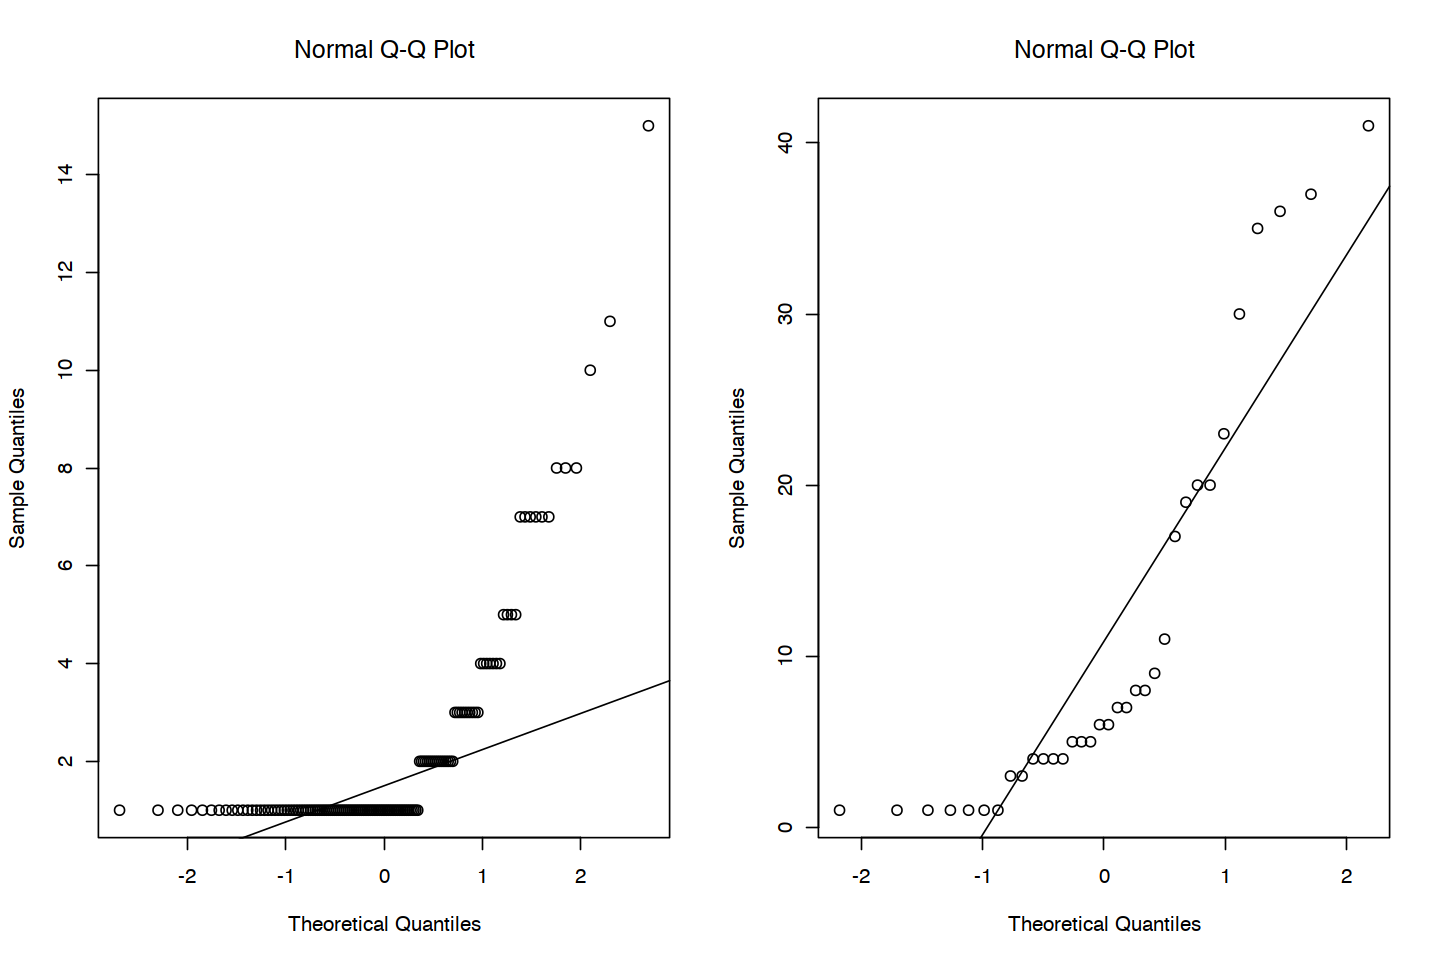

In [98]:
par(mfrow = c(1,2))
qqnorm(uni.int)
qqline(uni.int)

qqnorm(liz.int)
qqline(liz.int)

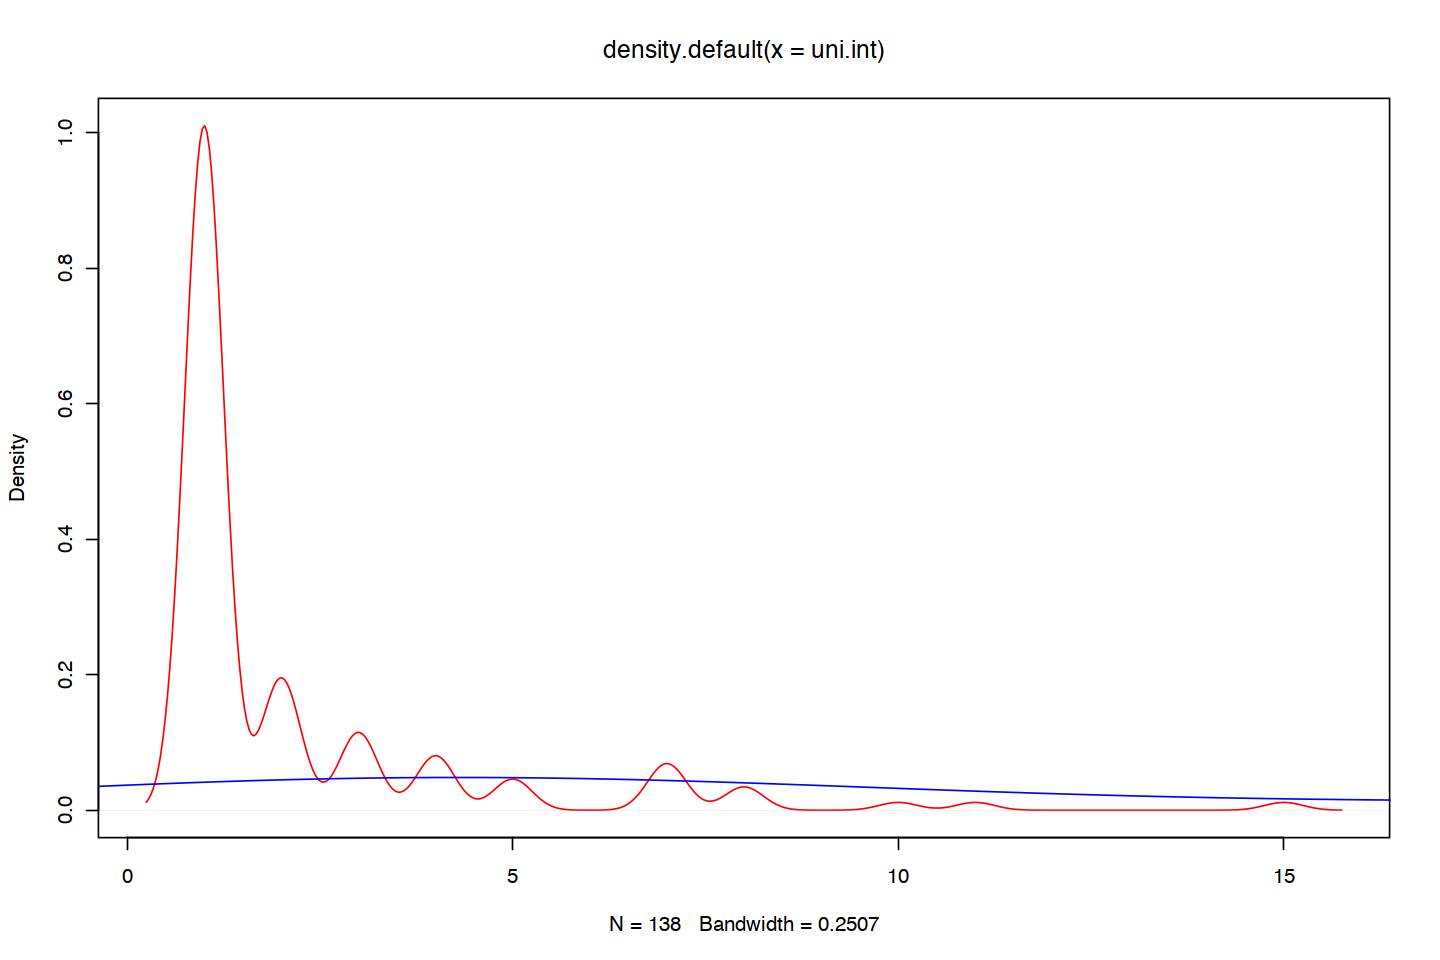

In [99]:
plot(density(uni.int),col="red")
lines(density(liz.int),col="blue")

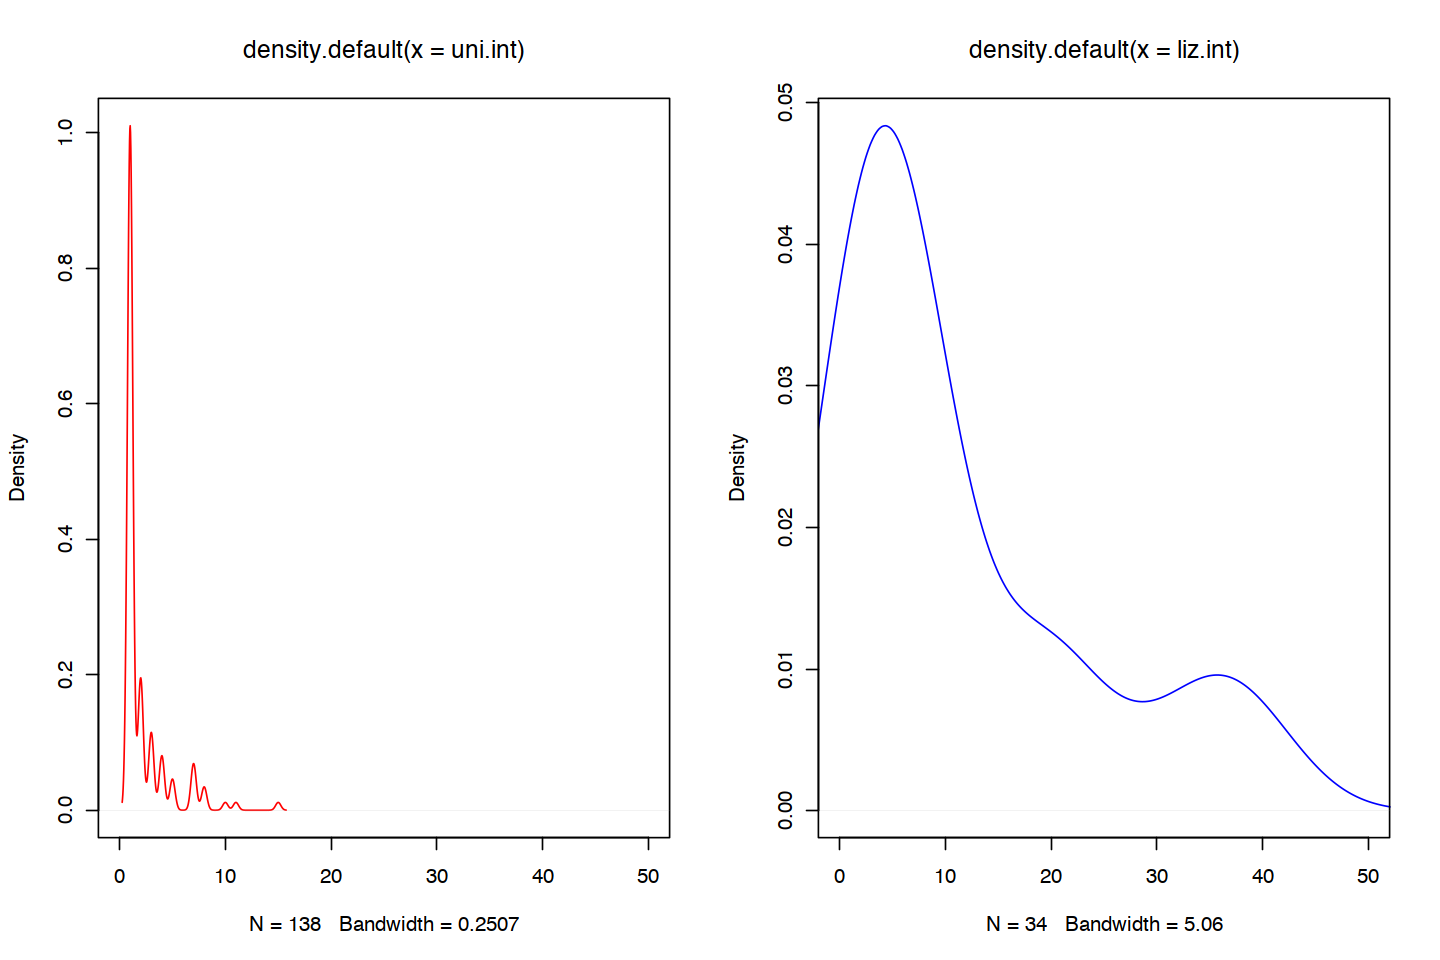

In [100]:
par(mfrow = c(1,2))
plot(density(uni.int),col="red",xlim=c(0,50))
plot(density(liz.int),col="blue",xlim=c(0,50))

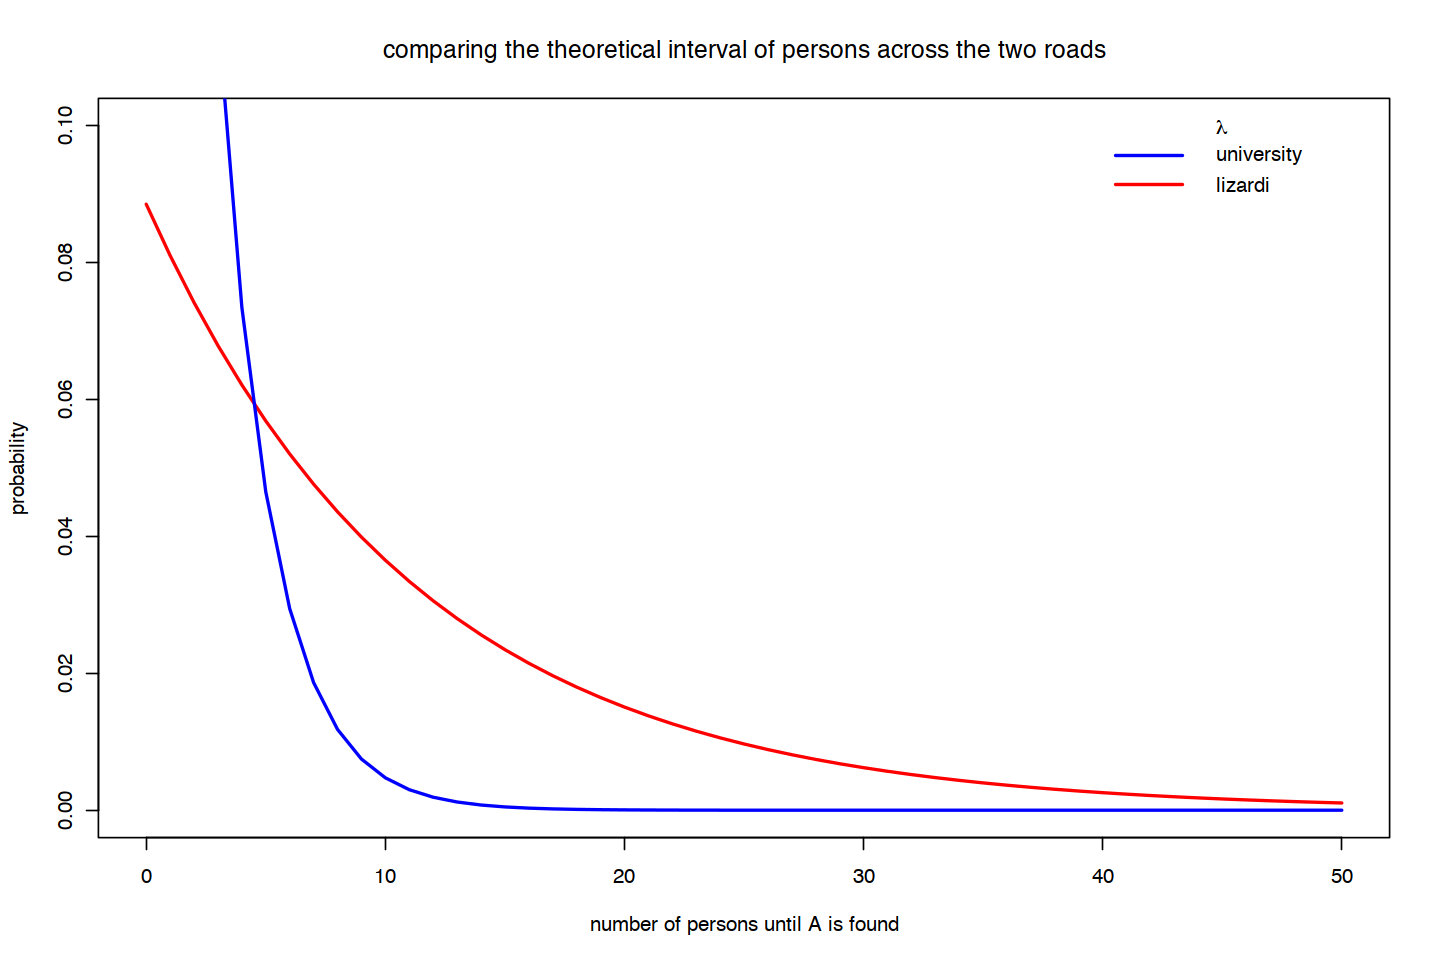

In [101]:
person.num <- seq(0, 50, by = 1)# Specify x-values 
#for exp function
#Now, we can apply the dexp function with a rate of 5 as follows:
int.p <- dexp(person.num, rate = 1/mean(liz.int))  
int.t <- dexp(person.num, rate = 1/mean(uni.int))  

plot(person.num,int.p,main="comparing the theoretical interval of persons across the two roads",
     type="l",lwd=2,col="red",xlab="number of persons until A is found",
     ylim=c(0,0.1),ylab="probability")
lines(person.num,int.t,
      type="l",lwd=2,col="blue")
      # Adding a legend
legend("topright", c(expression(paste(, lambda)), "university", "lizardi"),
       lty = c(0, 1, 1), col = c("red", "blue"), box.lty = 0, lwd = 2)

In [93]:
summary(uni.int)
summary(liz.int)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   2.188   2.000  15.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    3.25    6.00   11.29   18.50   41.00 

In [94]:
wilcox.test(uni.int,liz.int)


	Wilcoxon rank sum test with continuity correction

data:  uni.int and liz.int
W = 889.5, p-value = 7.961e-10
alternative hypothesis: true location shift is not equal to 0


The probability of finding A every x number of persons is really high at campus, a mean examination of two persons is usually enough to find A, whereas in Lizardi a count of 11 persons is needed. It is really hard to go beyond 10 persons at the University without finding A, whereas in Lizardi drops exponentially till 40 persons.

In [ ]:
#https://r-coder.com/exponential-distribution-r/

In [51]:
#the probability of the variable interval (of rate 1/2 aprox) taking a value lower or equal to 10 at the uni is
pexp(10,1/mean(uni.int))

[1] 0.9896372

In [52]:
#the probability of the variable interval (of rate 1/2 aprox) taking a value lower or equal to 10 at Lizardi is
pexp(10,1/mean(liz.int))

[1] 0.5874578

In [56]:
qexp(0.989637237466056,1/mean(uni.int))

[1] 10

In [58]:
qexp(0.95,1/mean(uni.int))#95% of the values would be of less or equal to

[1] 6.555878

In [59]:
qexp(0.95,1/mean(liz.int))#and in Lizardi

[1] 33.83415

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fi.pinimg.com%2Foriginals%2F34%2F9b%2Fdc%2F349bdce7fbcc03eb560ccd0ace5c1437.gif&f=1&nofb=1" alt="centered image" />